La magnitud de la corriente que circula por la resistencia R1 es: 17.675079425694953 amperios
El ángulo de la corriente es: -32.84351621893461 grados
La impedancia equivalente del paralelo es: (9.457326997540022+6.750533874055339j) ohmios
La magnitud de la impedancia equivalente del paralelo es: 11.619412270987201 ohmios
La caída de tensión en la impedancia equivalente del paralelo es: 205.37403476959335 voltios
El ángulo de la caída de tensión en la impedancia equivalente del paralelo es: 2.6753038006254672 grados
La magnitud de la corriente en Z_RL es: 14.529207899007341 amperios
El ángulo de la corriente en Z_RL es: -42.29679286258463 grados
La magnitud de la corriente en R3 es: 4.1074806953918666 amperios
El ángulo de la corriente en R3 es: 2.6753038006254672 grados
La potencia reactiva en el inductor es: 2108.9237075131095 VAR
El valor del capacitor necesario para minimizar la potencia disipada en R1 es: 0.000159154867597083 faradios


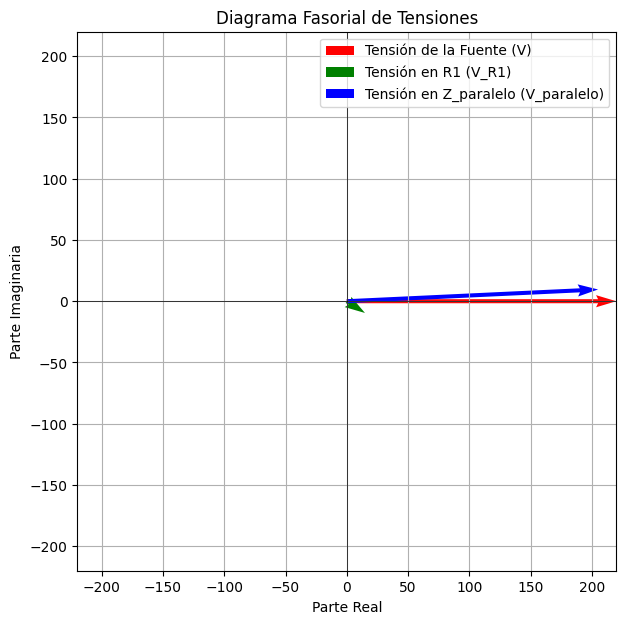

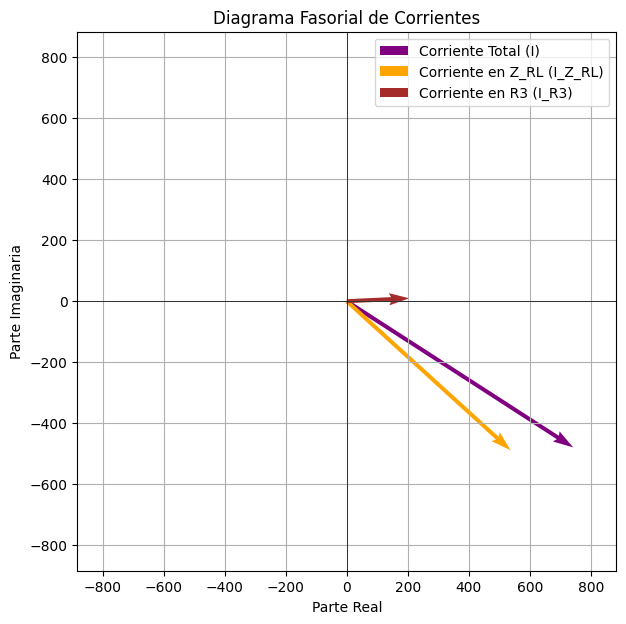

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# CALCULO DEL CIRCUITO SIN CAPACITOR Y CON LOS FASORES GRAFICADOS

# Datos del circuito
V = 220  # Voltios
R1 = 1   # Ohmios
R2 = 10  # Ohmios
R3 = 50  # Ohmios
L1 = 0.0318  # Henry
f = 50  # Hertz

# Convertir la frecuencia a radianes por segundo
w = 2 * np.pi * f

# Calcular la impedancia Z_RL del inductor L1 y Resistencia R2
Z_RL = R2 + 1j * w * L1  # Impedancia del inductor + resistencia R2 en serie

# Calcular la impedancia equivalente del paralelo entre Z_L y R3
Z_paralelo = 1 / (1/Z_RL + 1/R3)

# Calcular la impedancia total en serie con R1
Z_total = R1 + Z_paralelo

# Calcular la corriente total en el circuito
I = V / Z_total

# Calcular el ángulo de la corriente total en grados
angulo_I = np.angle(I, deg=True)

# Calcular la caída de tensión en Z_paralelo
V_paralelo = V - I * R1

# Convertir la caída de tensión a forma polar
V_paralelo_magnitud = abs(V_paralelo)
V_paralelo_angulo = np.angle(V_paralelo, deg=True)

# Calcular la corriente en Z_RL
I_Z_RL = V_paralelo / Z_RL
# Convertir la corriente a forma polar
I_Z_RL_magnitud = abs(I_Z_RL)
I_Z_RL_angulo = np.angle(I_Z_RL, deg=True)

# Calcular la corriente en R3
I_R3 = V_paralelo / R3
# Convertir la corriente a forma polar
I_R3_magnitud = abs(I_R3)
I_R3_angulo = np.angle(I_R3, deg=True)

# Calcular la potencia reactiva en el inductor y el capacitor
Q_L = (I_Z_RL_magnitud**2) * w * L1

# Calcular el valor del capacitor en función de la potencia reactiva del Inductor L1
C1 = Q_L / (w * V_paralelo_magnitud**2)

# Imprimir los resultados
print("La magnitud de la corriente que circula por la resistencia R1 es:", abs(I), "amperios")
print("El ángulo de la corriente es:", angulo_I, "grados")
print("La impedancia equivalente del paralelo es:", Z_paralelo, "ohmios")
print("La magnitud de la impedancia equivalente del paralelo es:", abs(Z_paralelo), "ohmios")
print("La caída de tensión en la impedancia equivalente del paralelo es:", V_paralelo_magnitud, "voltios")
print("El ángulo de la caída de tensión en la impedancia equivalente del paralelo es:", V_paralelo_angulo, "grados")
print("La magnitud de la corriente en Z_RL es:", I_Z_RL_magnitud, "amperios")
print("El ángulo de la corriente en Z_RL es:", I_Z_RL_angulo, "grados")
print("La magnitud de la corriente en R3 es:", I_R3_magnitud, "amperios")
print("El ángulo de la corriente en R3 es:", I_R3_angulo, "grados")
print("La potencia reactiva en el inductor es:", Q_L, "VAR")
print("El valor del capacitor necesario para minimizar la potencia disipada en R1 es:", C1, "faradios")

# Función para graficar fasores
def plot_fasor(ax, magnitud, angulo, label, color, scale=1):
    angulo_rad = np.deg2rad(angulo)
    ax.quiver(0, 0, magnitud * np.cos(angulo_rad) * scale, magnitud * np.sin(angulo_rad) * scale,
              angles='xy', scale_units='xy', scale=1, color=color, label=label)

# Graficar los fasores de tensiones
fig1, ax1 = plt.subplots(figsize=(7, 7))
plot_fasor(ax1, V, 0, 'Tensión de la Fuente (V)', 'red', 1)
plot_fasor(ax1, abs(I * R1), np.angle(I * R1, deg=True), 'Tensión en R1 (V_R1)', 'green', 1)
plot_fasor(ax1, V_paralelo_magnitud, V_paralelo_angulo, 'Tensión en Z_paralelo (V_paralelo)', 'blue', 1)

ax1.set_title('Diagrama Fasorial de Tensiones')
ax1.set_xlabel('Parte Real')
ax1.set_ylabel('Parte Imaginaria')
ax1.legend()
ax1.grid()
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_xlim(-V, V)
ax1.set_ylim(-V, V)
ax1.set_aspect('equal', adjustable='box')

# Graficar los fasores de corriente
fig2, ax2 = plt.subplots(figsize=(7, 7))
scale_factor = 50  # Factor de escala para hacer visibles los fasores de corriente
plot_fasor(ax2, abs(I), angulo_I, 'Corriente Total (I)', 'purple', scale_factor)
plot_fasor(ax2, I_Z_RL_magnitud, I_Z_RL_angulo, 'Corriente en Z_RL (I_Z_RL)', 'orange', scale_factor)
plot_fasor(ax2, I_R3_magnitud, I_R3_angulo, 'Corriente en R3 (I_R3)', 'brown', scale_factor)

ax2.set_title('Diagrama Fasorial de Corrientes')
ax2.set_xlabel('Parte Real')
ax2.set_ylabel('Parte Imaginaria')
ax2.legend()
ax2.grid()
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlim(-scale_factor * abs(I), scale_factor * abs(I))
ax2.set_ylim(-scale_factor * abs(I), scale_factor * abs(I))
ax2.set_aspect('equal', adjustable='box')

plt.show()


La magnitud de la corriente que circula por la resistencia R1 es: 14.401881057616347 amperios
El ángulo de la corriente es: 1.0608140138963013e-14 grados
La impedancia equivalente del paralelo es: (14.275782317592071-2.8282648553600636e-15j) ohmios
La magnitud de la impedancia equivalente del paralelo es: 14.275782317592071 ohmios
La caída de tensión en la impedancia equivalente del paralelo es: 205.59811894238365 voltios
El ángulo de la caída de tensión en la impedancia equivalente del paralelo es: -7.430864314798765e-16 grados
La magnitud de la corriente en Z_RL es: 14.5450607576075 amperios
El ángulo de la corriente en Z_RL es: -44.97209666321009 grados
La magnitud de la corriente en Z_C es: 10.27990107086743 amperios
El ángulo de la corriente en Z_C es: 90.0 grados
La magnitud de la corriente en R3 es: 4.111962378847673 amperios
El ángulo de la corriente en R3 es: -7.430864314798764e-16 grados
La potencia reactiva en el inductor es: 2113.528323084138 VAR
La potencia reactiva en el 

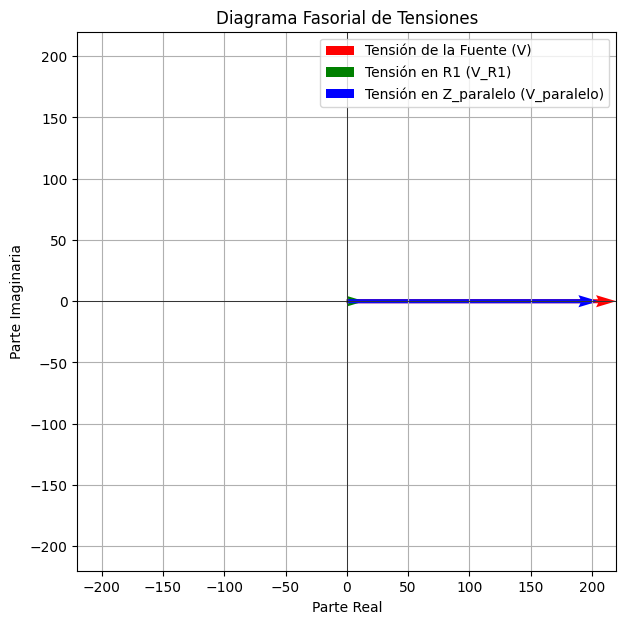

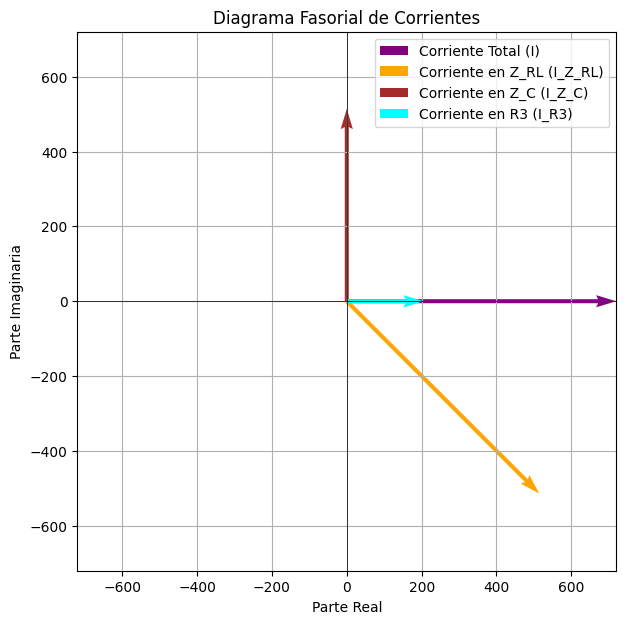

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# CALCULO DEL CIRCUITO CON CAPACITOR Y CON LOS FASORES GRAFICADOS

# Datos del circuito
V = 220  # Voltios
R1 = 1   # Ohmios
R2 = 10  # Ohmios
R3 = 50  # Ohmios
L1 = 0.0318  # Henry
C = 0.000159154867597083  # Faradios (0.159e-3)
f = 50  # Hertz

# Convertir la frecuencia a radianes por segundo
w = 2 * np.pi * f

# Calcular la impedancia Z_RL y Z_C
Z_RL = R2 + 1j * w * L1  # Impedancia del inductor L1 + la resistencia R2
Z_C = 1 / (1j * w * C)  # Impedancia del capacitor

# Calcular la impedancia equivalente del paralelo entre Z_RL, Z_C y R3
Z_paralelo = 1 / (1/Z_RL + 1/Z_C + 1/R3)

# Calcular la impedancia total en serie con R1
Z_total = R1 + Z_paralelo

# Calcular la corriente total en el circuito
I = V / Z_total

# Calcular el ángulo de la corriente total en grados
angulo_I = np.angle(I, deg=True)

# Calcular la caída de tensión en Z_paralelo
V_paralelo = V - I * R1

# Convertir la caída de tensión a forma polar
V_paralelo_magnitud = abs(V_paralelo)
V_paralelo_angulo = np.angle(V_paralelo, deg=True)

# Calcular la corriente en Z_RL y Z_C
I_Z_RL = V_paralelo / Z_RL
I_Z_C = V_paralelo / Z_C

# Convertir las corrientes a forma polar
I_Z_RL_magnitud = abs(I_Z_RL)
I_Z_RL_angulo = np.angle(I_Z_RL, deg=True)

I_Z_C_magnitud = abs(I_Z_C)
I_Z_C_angulo = np.angle(I_Z_C, deg=True)

# Calcular la corriente en R3
I_R3 = V_paralelo / R3
# Convertir la corriente a forma polar
I_R3_magnitud = abs(I_R3)
I_R3_angulo = np.angle(I_R3, deg=True)

# Calcular la potencia reactiva en el inductor y el capacitor
Q_L = (I_Z_RL_magnitud**2) * w * L1
Q_C = -(I_Z_C_magnitud**2) * (1/(w * C))

# Imprimir los resultados
print("La magnitud de la corriente que circula por la resistencia R1 es:", abs(I), "amperios")
print("El ángulo de la corriente es:", angulo_I, "grados")
print("La impedancia equivalente del paralelo es:", Z_paralelo, "ohmios")
print("La magnitud de la impedancia equivalente del paralelo es:", abs(Z_paralelo), "ohmios")
print("La caída de tensión en la impedancia equivalente del paralelo es:", V_paralelo_magnitud, "voltios")
print("El ángulo de la caída de tensión en la impedancia equivalente del paralelo es:", V_paralelo_angulo, "grados")
print("La magnitud de la corriente en Z_RL es:", I_Z_RL_magnitud, "amperios")
print("El ángulo de la corriente en Z_RL es:", I_Z_RL_angulo, "grados")
print("La magnitud de la corriente en Z_C es:", I_Z_C_magnitud, "amperios")
print("El ángulo de la corriente en Z_C es:", I_Z_C_angulo, "grados")
print("La magnitud de la corriente en R3 es:", I_R3_magnitud, "amperios")
print("El ángulo de la corriente en R3 es:", I_R3_angulo, "grados")
print("La potencia reactiva en el inductor es:", Q_L, "VAR")
print("La potencia reactiva en el capacitor es:", Q_C, "VAR")

# Función para graficar fasores
def plot_fasor(ax, magnitud, angulo, label, color, scale=1):
    angulo_rad = np.deg2rad(angulo)
    ax.quiver(0, 0, magnitud * np.cos(angulo_rad) * scale, magnitud * np.sin(angulo_rad) * scale,
              angles='xy', scale_units='xy', scale=1, color=color, label=label)

# Graficar los fasores de tensiones
fig1, ax1 = plt.subplots(figsize=(7, 7))
plot_fasor(ax1, V, 0, 'Tensión de la Fuente (V)', 'red', 1)
plot_fasor(ax1, abs(I * R1), np.angle(I * R1, deg=True), 'Tensión en R1 (V_R1)', 'green', 1)
plot_fasor(ax1, V_paralelo_magnitud, V_paralelo_angulo, 'Tensión en Z_paralelo (V_paralelo)', 'blue', 1)

ax1.set_title('Diagrama Fasorial de Tensiones')
ax1.set_xlabel('Parte Real')
ax1.set_ylabel('Parte Imaginaria')
ax1.legend()
ax1.grid()
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_xlim(-V, V)
ax1.set_ylim(-V, V)
ax1.set_aspect('equal', adjustable='box')

# Graficar los fasores de corriente
fig2, ax2 = plt.subplots(figsize=(7, 7))
scale_factor = 50  # Factor de escala para hacer visibles los fasores de corriente
plot_fasor(ax2, abs(I), angulo_I, 'Corriente Total (I)', 'purple', scale_factor)
plot_fasor(ax2, I_Z_RL_magnitud, I_Z_RL_angulo, 'Corriente en Z_RL (I_Z_RL)', 'orange', scale_factor)
plot_fasor(ax2, I_Z_C_magnitud, I_Z_C_angulo, 'Corriente en Z_C (I_Z_C)', 'brown', scale_factor)
plot_fasor(ax2, I_R3_magnitud, I_R3_angulo, 'Corriente en R3 (I_R3)', 'cyan', scale_factor)

ax2.set_title('Diagrama Fasorial de Corrientes')
ax2.set_xlabel('Parte Real')
ax2.set_ylabel('Parte Imaginaria')
ax2.legend()
ax2.grid()
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlim(-scale_factor * abs(I), scale_factor * abs(I))
ax2.set_ylim(-scale_factor * abs(I), scale_factor * abs(I))
ax2.set_aspect('equal', adjustable='box')

plt.show()
